In [3]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath('F:/portneuf/analysis/utils/'))
import trend_sen
import contextily as ctx

In [4]:
df = pd.read_csv('openet_huc12_mean.csv')

In [5]:
df

,Date,huc12,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean
0,1999-10-01,170402080608,42.026444,28.041041,28.943985,39.911444,NaN,48.646364,49.580417
1,1999-10-01,170402080102,26.512871,18.490520,32.791097,33.195032,NaN,30.227945,23.308316
2,1999-10-01,170402080104,30.285855,20.160616,48.614720,38.381079,NaN,38.517728,22.781635
3,1999-10-01,170402080106,24.470616,13.929165,36.829052,34.803774,NaN,26.359794,20.717864
4,1999-10-01,170402080107,26.152002,12.648812,29.883294,34.669593,NaN,27.575865,27.614493
...,...,...,...,...,...,...,...,...,...
13381,2023-12-01,170402080401,6.958857,6.613775,13.948754,8.504706,8.671903,6.975248,1.646916
13382,2023-12-01,170402080403,5.467448,4.827527,15.164764,5.874018,5.271535,7.039569,3.649094
13383,2023-12-01,170402080205,10.241848,9.108799,14.915002,16.996438,11.904131,8.117858,2.384249
13384,2023-12-01,170402080402,4.782044,1.460260,11.349560,5.358675,6.204585,6.384312,3.411171


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [8]:
df = df[(df['irr_year'] >= 2000) & (df['irr_year'] <= 2023)]

In [9]:
df

,Date,huc12,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean,month,year,irr_year
46,1999-11-01,170402080608,22.088297,10.632374,15.982682,25.476491,NaN,25.792945,23.995885,11,1999,2000
47,1999-11-01,170402080102,17.074354,9.385329,20.071077,19.317554,NaN,18.409116,20.751129,11,1999,2000
48,1999-11-01,170402080104,17.458383,7.252574,25.672354,19.437537,NaN,26.642012,15.400940,11,1999,2000
49,1999-11-01,170402080106,13.759220,5.767343,18.016403,18.620186,NaN,16.336871,14.353771,11,1999,2000
50,1999-11-01,170402080107,15.522201,5.367181,16.316673,18.687453,NaN,18.253560,20.459960,11,1999,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
13289,2023-10-01,170402080401,36.279333,17.821051,54.189144,43.491394,34.415321,33.751811,40.820469,10,2023,2023
13290,2023-10-01,170402080403,35.491706,15.369492,62.243028,43.594079,33.811525,37.104112,36.387087,10,2023,2023
13291,2023-10-01,170402080205,38.320122,23.245931,50.384700,44.647535,34.516193,34.631707,45.891995,10,2023,2023
13292,2023-10-01,170402080402,37.404697,19.029515,56.132154,45.054196,40.683638,34.876683,40.558340,10,2023,2023


In [5]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [6]:
var_cols = ['ensb_mean', 'sebal_mean', 'sims_mean', 'ptjpl_mean',
       'alexi_mean', 'sseb_mean', 'metric_mean']

In [7]:
agg_irr_year = df.groupby(['huc12', 'irr_year',])[var_cols].sum().reset_index() 

In [8]:
agg_irr_year

,huc12,irr_year,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean
0,170402080101,2000,448.346849,489.490526,442.276617,522.299940,0.000000,401.436618,402.605681
1,170402080101,2001,415.788127,424.232121,382.379758,435.979678,495.812920,454.796334,333.982366
2,170402080101,2002,485.282813,525.341529,436.724728,555.518246,534.033936,417.903270,415.993276
3,170402080101,2003,479.404966,590.240229,388.202731,518.194162,550.613555,356.495890,362.993652
4,170402080101,2004,525.872409,617.857224,511.010629,555.865351,606.772722,441.666368,465.936850
...,...,...,...,...,...,...,...,...,...
1099,170402080608,2019,795.490801,812.930713,759.878021,851.551145,789.512759,783.024605,742.984448
1100,170402080608,2020,841.700934,874.837590,740.793201,794.467114,848.366672,830.242490,791.182778
1101,170402080608,2021,760.491332,842.479610,769.125113,736.162158,739.927132,765.199902,653.951839
1102,170402080608,2022,772.304480,852.020451,780.783048,745.182367,760.021543,785.872032,699.924098


In [9]:
agg_long_term = agg_irr_year.groupby('huc12')[var_cols].agg(['mean', 'std']).reset_index()

In [10]:
agg_long_term

huc12   ensb_mean             sebal_mean              sims_mean  \
                        mean        std        mean        std        mean   
0   170402080101  521.059267  45.491045  571.593837  59.073234  523.940613   
1   170402080102  573.591812  35.188852  603.484318  51.762941  658.496275   
2   170402080103  720.169150  38.775466  763.949511  41.093883  681.802957   
3   170402080104  607.370034  31.228559  632.850040  39.174500  819.784183   
4   170402080105  565.113516  40.732859  555.302565  53.591749  683.889377   
5   170402080106  569.524719  40.947875  583.076714  51.903636  684.324912   
6   170402080107  529.718865  47.689385  508.167957  55.005962  630.702633   
7   170402080108  544.369841  41.592414  503.455837  55.406453  672.626026   
8   170402080201  544.163750  51.441325  518.114802  66.798661  617.024818   
9   170402080202  520.591443  48.627032  493.570758  56.755946  593.264584   
10  170402080203  611.659585  43.746002  607.785695  52.878724  659.781695   
11  170402080204  607.247501  49.374959  574.545883  53.444588  658.288784   
12  170402080205  528.224463  45.601011  511.954116  52.172502  546.852012   
13  170402080206  666.914387  37.969296  685.659256  42.348043  703.311533   
14  170402080207  644.261620  36.722100  639.421790  44.136931  727.240185   
15  170402080208  658.284290  46.359939  677.644479  55.259436  753.091242   
16  170402080209  706.894950  38.873841  758.480772  43.903217  812.948041   
17  170402080210  588.934424  44.234869  569.967347  52.200078  728.406484   
18  170402080211  579.615814  44.205496  575.179537  47.130698  701.976396   
19  170402080301  662.243991  35.131452  692.895344  39.296532  556.293837   
20  170402080302  494.014442  49.667349  522.268704  54.198620  601.635043   
21  170402080303  598.761567  36.007726  627.237572  38.851581  575.679102   
22  170402080304  553.605077  32.035673  549.833891  35.087531  652.987142   
23  170402080305  529.820514  39.349171  501.223746  42.395812  601.776993   
24  170402080306  508.709049  47.089462  468.730083  53.170393  615.434329   
25  170402080307  542.617201  47.163738  552.342020  49.587395  620.816420   
26  170402080308  477.023493  45.158577  445.622914  53.505276  603.246385   
27  170402080401  504.288437  49.120967  472.133807  50.752137  621.249309   
28  170402080402  591.866010  35.750933  563.407288  39.148209  659.180671   
29  170402080403  536.342941  39.071083  479.144077  48.733975  704.837798   
30  170402080404  524.845869  35.177282  488.546220  44.142354  674.766577   
31  170402080501  635.331214  39.986657  638.861216  49.447501  760.292895   
32  170402080502  616.585653  44.661861  614.914396  49.538484  714.246209   
33  170402080503  502.558272  39.459089  475.923453  48.894734  645.976934   
34  170402080504  631.619366  35.689937  647.981386  51.332654  679.198031   
35  170402080505  466.917724  32.042943  486.309672  59.844801  567.115428   
36  170402080506  522.886723  30.717265  572.474402  52.221034  652.742105   
37  170402080507  468.981790  28.875091  523.121911  53.925843  635.770525   
38  170402080601  570.691058  35.191361  624.436058  44.890816  566.764046   
39  170402080602  477.223751  36.006145  533.926929  40.855793  521.319004   
40  170402080603  621.690750  37.314376  659.600440  49.414076  609.515659   
41  170402080604  378.776091  30.716114  430.151445  41.610152  659.955282   
42  170402080605  473.544228  28.324651  519.491410  47.543533  673.577374   
43  170402080606  632.818189  30.607773  674.033010  53.907554  713.539295   
44  170402080607  625.787633  25.854017  687.514221  46.427746  703.045209   
45  170402080608  771.981576  35.764962  815.638227  44.450508  727.529013   

                ptjpl_mean             alexi_mean               sseb_mean  \
           std        mean        std        mean         std        mean   
0    85.735334  556.973746  49.166958  546.209306  124.093418  461.598582   
1    69.426183  594.617378  44.7939

In [11]:
agg_stats = agg_irr_year.groupby('huc12')[var_cols].agg(['mean', 'std'])

agg_stats.columns = [f"{var}_{stat}" for var, stat in agg_stats.columns]

for var in var_cols:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    cv_col = f"{var}_cv"
    agg_stats[cv_col] = agg_stats[std_col] / agg_stats[mean_col]
    
# Step 4: Reset index
agg_stats = agg_stats.reset_index()


In [12]:
agg_stats

,huc12,ensb_mean_mean,ensb_mean_std,sebal_mean_mean,sebal_mean_std,sims_mean_mean,sims_mean_std,ptjpl_mean_mean,ptjpl_mean_std,alexi_mean_mean,...,sseb_mean_std,metric_mean_mean,metric_mean_std,ensb_mean_cv,sebal_mean_cv,sims_mean_cv,ptjpl_mean_cv,alexi_mean_cv,sseb_mean_cv,metric_mean_cv
0,170402080101,521.059267,45.491045,571.593837,59.073234,523.940613,85.735334,556.973746,49.166958,546.209306,...,50.755397,479.820982,68.516074,0.087305,0.103348,0.163636,0.088275,0.227190,0.109956,0.142795
1,170402080102,573.591812,35.188852,603.484318,51.762941,658.496275,69.426183,594.617378,44.793925,613.538554,...,43.955960,491.924705,56.241459,0.061348,0.085773,0.105431,0.075332,0.225295,0.078277,0.114329
2,170402080103,720.169150,38.775466,763.949511,41.093883,681.802957,83.318945,671.492173,41.325689,720.263667,...,46.651080,650.601892,56.299007,0.053842,0.053791,0.122204,0.061543,0.241261,0.055232,0.086534
3,170402080104,607.370034,31.228559,632.850040,39.174500,819.784183,69.563776,607.409342,40.072010,641.211338,...,34.313871,529.959279,42.014589,0.051416,0.061902,0.084856,0.065972,0.226850,0.051586,0.079279
4,170402080105,565.113516,40.732859,555.302565,53.591749,683.889377,73.395178,594.503928,50.395046,610.603867,...,48.801489,495.814260,62.498046,0.072079,0.096509,0.107320,0.084768,0.228126,0.090140,0.126051
5,170402080106,569.524719,40.947875,583.076714,51.903636,684.324912,79.361931,606.385865,48.693541,597.315061,...,42.551298,493.860706,66.623012,0.071898,0.089017,0.115971,0.080301,0.230065,0.075825,0.134902
6,170402080107,529.718865,47.689385,508.167957,55.005962,630.702633,74.741068,593.564729,59.247206,562.930929,...,43.041690,451.291890,64.190640,0.090028,0.108244,0.118504,0.099816,0.235314,0.084993,0.142238
7,170402080108,544.369841,41.592414,503.455837,55.406453,672.626026,74.645454,598.150698,57.960176,595.433913,...,43.047065,492.829852,52.977908,0.076405,0.110052,0.110976,0.096899,0.230950,0.082792,0.107497
8,170402080201,544.163750,51.441325,518.114802,66.798661,617.024818,56.200711,586.160917,58.365903,585.432698,...,43.220546,543.400856,68.471928,0.094533,0.128926,0.091083,0.099573,0.230470,0.088605,0.126006
9,170402080202,520.591443,48.627032,493.570758,56.755946,593.264584,65.670905,584.203727,61.338798,575.691497,...,39.222572,474.678609,59.816881,0.093407,0.114990,0.110694,0.104996,0.229765,0.087150,0.126016


In [13]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [14]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
agg_stats['huc12'] = agg_stats['huc12'].astype(str)

In [15]:
# Merge the long-term statistics with the HUC12 GeoDataFrame (huc12_gdf)
huc12_gdf = gdf.merge(agg_stats, on='huc12', how='left')

In [16]:
huc12_gdf.columns

Index(['noncontr00', 'sourcedata', 'areaacres', 'humod', 'sourcefeat', 'huc12',
       'shape_leng', 'tohuc', 'states', 'sourceorig', 'shape_area', 'areasqkm',
       'hutype', 'name', 'tnmid', 'metasource', 'loaddate', 'gnis_id',
       'noncontrib', 'geometry', 'ensb_mean_mean', 'ensb_mean_std',
       'sebal_mean_mean', 'sebal_mean_std', 'sims_mean_mean', 'sims_mean_std',
       'ptjpl_mean_mean', 'ptjpl_mean_std', 'alexi_mean_mean',
       'alexi_mean_std', 'sseb_mean_mean', 'sseb_mean_std', 'metric_mean_mean',
       'metric_mean_std', 'ensb_mean_cv', 'sebal_mean_cv', 'sims_mean_cv',
       'ptjpl_mean_cv', 'alexi_mean_cv', 'sseb_mean_cv', 'metric_mean_cv'],
      dtype='object')

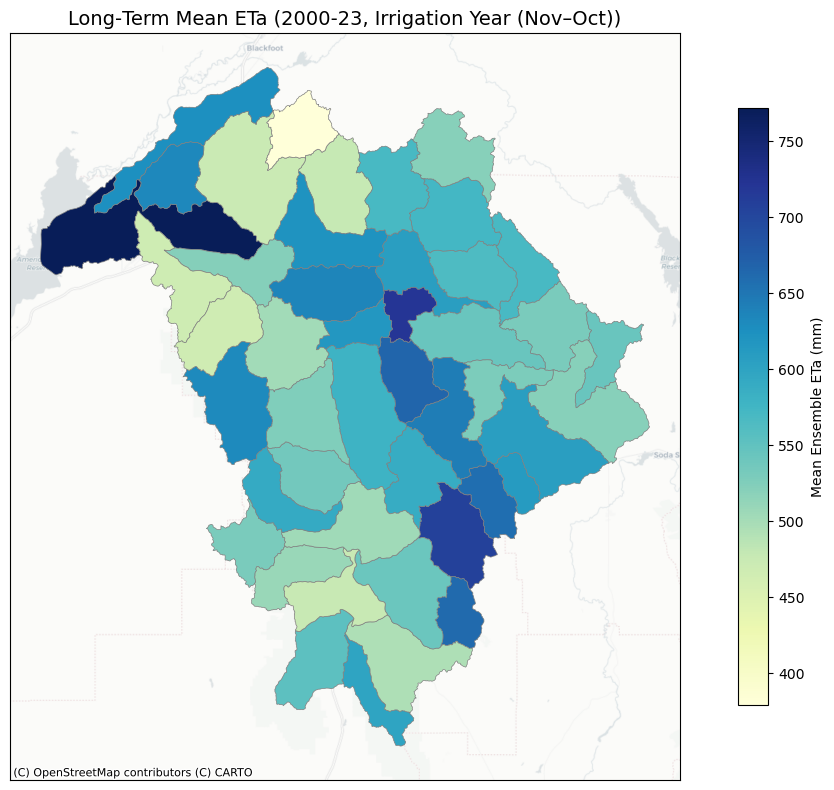

In [19]:
trend_sen.plot_gdf(
    huc12_gdf,
    column='ensb_mean_mean',
    cmap='YlGnBu',
    legend_label='Mean Ensemble ETa (mm)',
    figsize=(12, 8),
    basemap=True,
    save_path=None, #'ppt_mean_map.png',
    title='Long‑Term Mean ETa (2000-23, Irrigation Year (Nov–Oct))'
)
